<a href="https://colab.research.google.com/github/kazirafi17/TitanicSurvivalPrediction/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Load Data

In [2]:
# Import necessary libraries

import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Load Titanic dataset
df = pd.read_csv('titanic.csv')

# Display columns to inspect their names and content
df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,887.0,0.385569,0.487004,0.00,0.000,0.0000,1.0000,1.0000
Pclass,887.0,2.305524,0.836662,1.00,2.000,3.0000,3.0000,3.0000
Age,887.0,29.471443,14.121908,0.42,20.250,28.0000,38.0000,80.0000
Siblings/Spouses Aboard,887.0,0.525366,1.104669,0.00,0.000,0.0000,1.0000,8.0000
Parents/Children Aboard,887.0,0.383315,0.807466,0.00,0.000,0.0000,0.0000,6.0000
Fare,887.0,32.305420,49.782040,0.00,7.925,14.4542,31.1375,512.3292


In [6]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

#### Plotting

<Axes: xlabel='Sex', ylabel='count'>

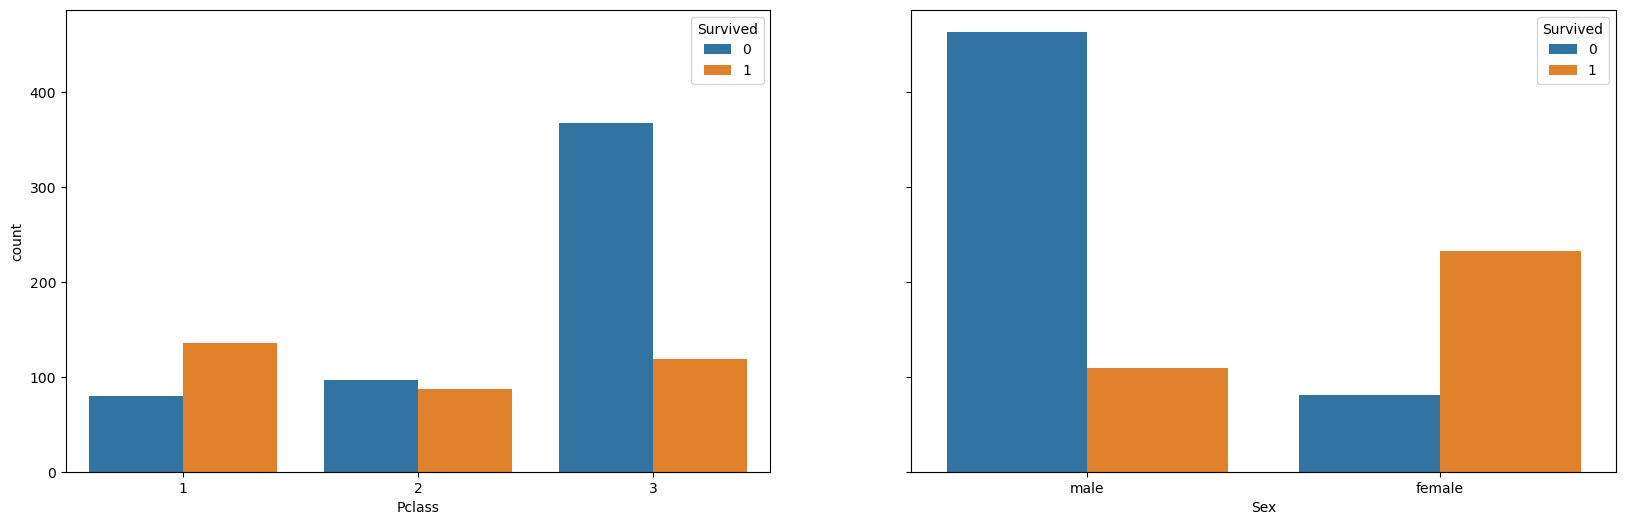

In [7]:
# Bar plot of survival by Pclass, Sex, Embarked
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

sns.countplot(data=df, x = 'Pclass', hue = 'Survived', ax=axes[0])
sns.countplot(data=df, x = 'Sex', hue = 'Survived', ax=axes[1])

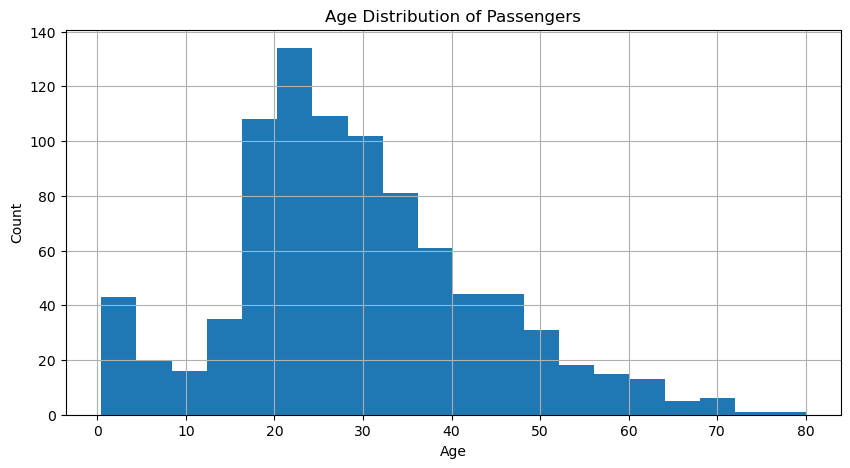

In [8]:
# Histogram of ages

plt.figure(figsize=(10, 5))
df['Age'].hist(bins=20)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

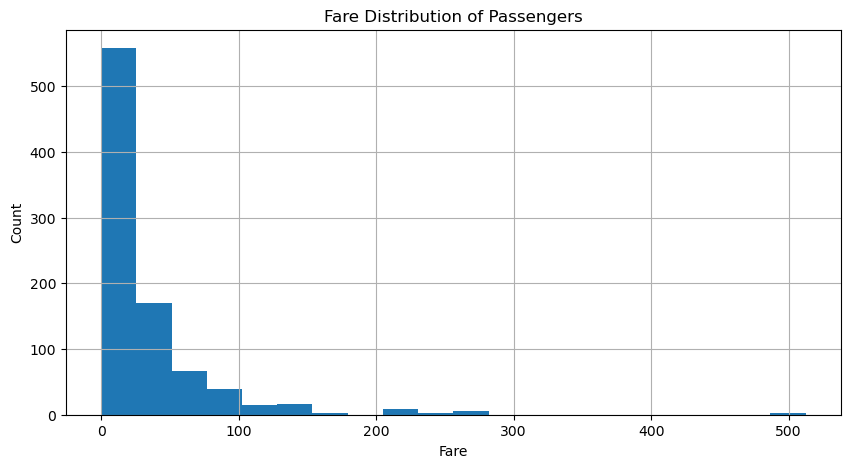

In [9]:
# Histogram of fare

plt.figure(figsize=(10, 5))
df['Fare'].hist(bins=20)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

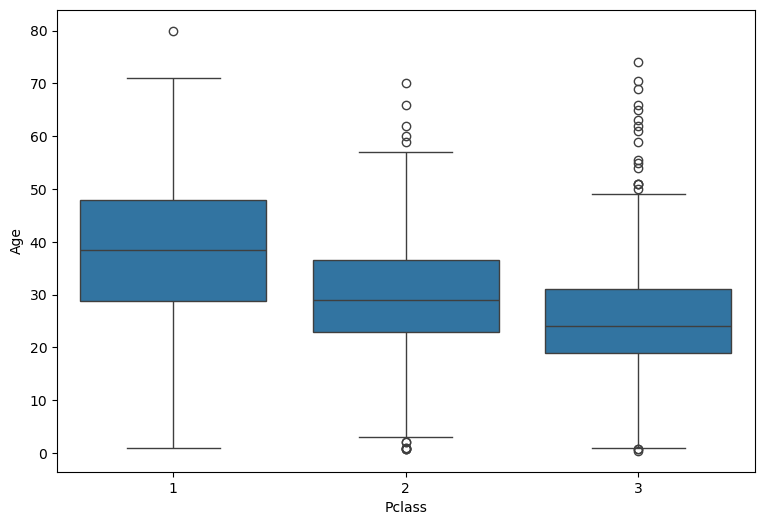

In [10]:
# Increase the plot size
plt.figure(figsize=(9, 6))

# Create the boxplot
sns.boxplot(x='Pclass', y='Age', data=df)

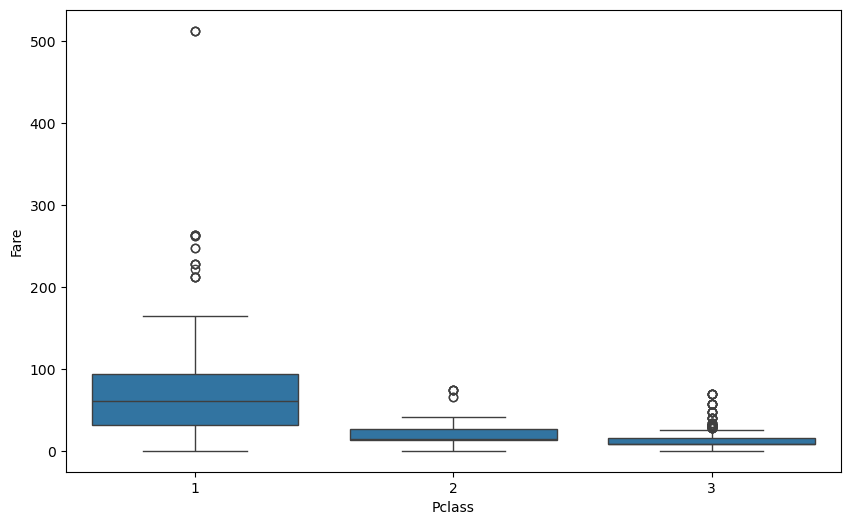

In [11]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Pclass', y='Fare', data=df)

# Show the plot
plt.show()


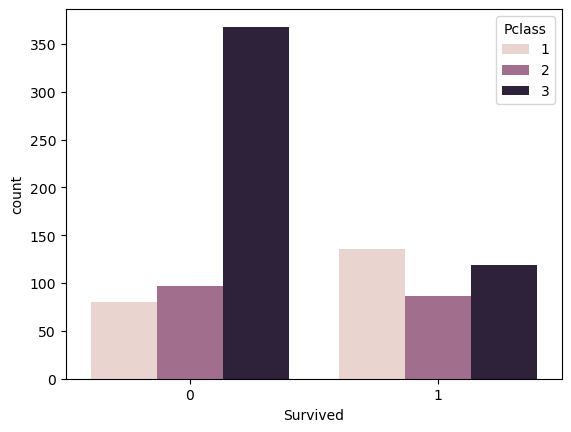

In [12]:
# Create the countplot
sns.countplot(x='Survived', hue='Pclass', data=df)

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11980\2608719158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],bins=40)


<Axes: xlabel='Fare', ylabel='Density'>

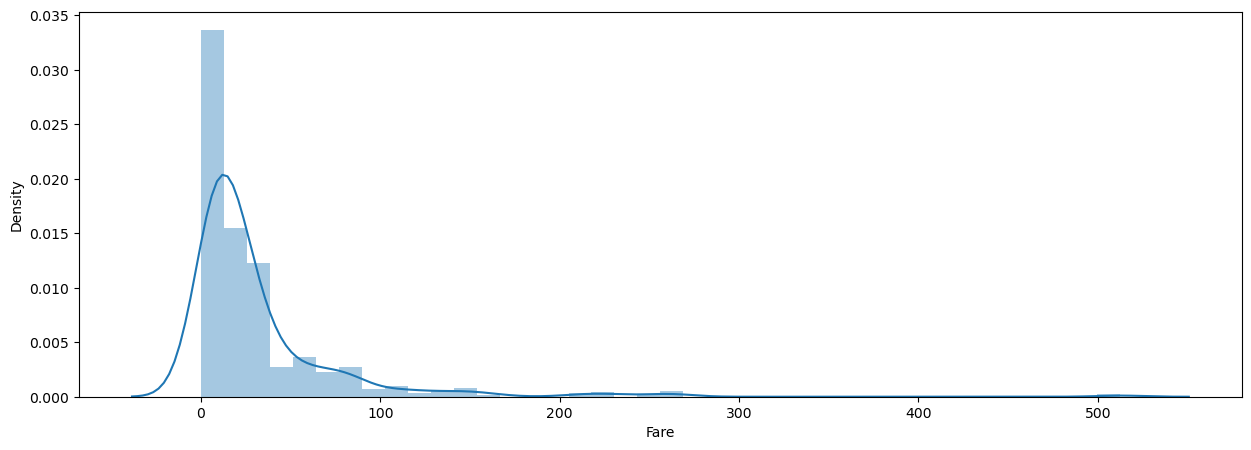

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df['Fare'],bins=40)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11980\3560539372.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fare,bins=40)


<Axes: xlabel='Fare', ylabel='Density'>

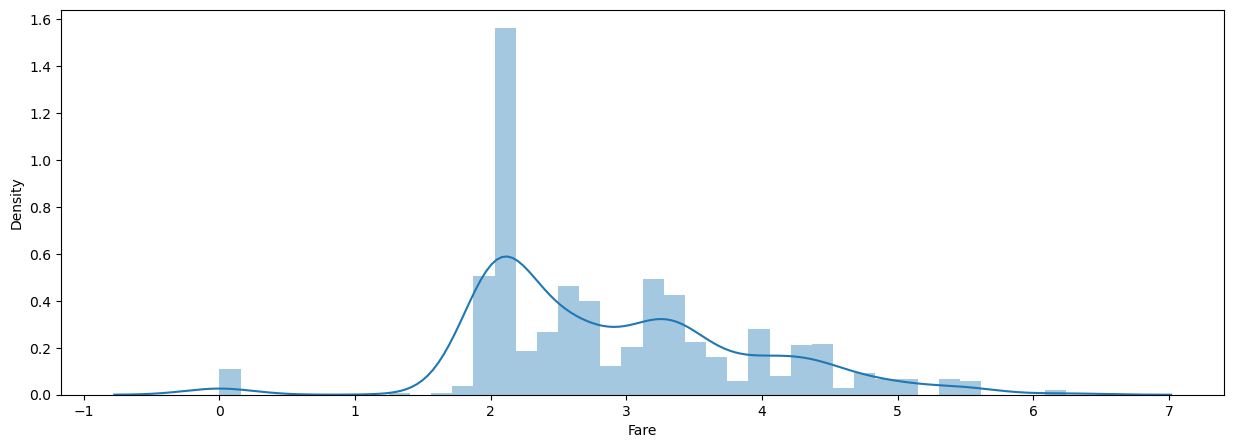

In [14]:
df_fare = df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(15,5))
sns.distplot(df_fare,bins=40)

#### EDA

In [15]:
fare= df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df['Fare'] = fare

In [16]:
#df['Sex'] = df['Sex'].astype(str)
df.drop(['Name'],inplace=True,axis=1)

In [17]:
df = pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [18]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'Sex_male'],
      dtype='object')

#### Model Selection

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

def evaluate_classifiers(data, target_col):


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # List of classifiers to evaluate
    classifiers = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Support Vector Machine': SVC(probability=True, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Naive Bayes': GaussianNB()
    }

    # Dictionary to store the results
    results = {}

    # Evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

        # Store the results
        results[name] = {
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall,
            'ROC AUC': roc_auc
        }

    return pd.DataFrame(results).T



# Assume 'target' is the name of the column to predict
results = evaluate_classifiers(df, 'target')

print(results)


                        Accuracy  F1 Score  Precision    Recall   ROC AUC
Random Forest           0.780899  0.781215   0.781581  0.780899  0.837569
XGBoost                 0.814607  0.813056   0.812865  0.814607  0.835821
Logistic Regression     0.758427  0.750846   0.755134  0.758427  0.828762
Support Vector Machine  0.696629  0.638934   0.740547  0.696629  0.827820
K-Nearest Neighbors     0.741573  0.735490   0.736630  0.741573  0.798978
Decision Tree           0.735955  0.738211   0.742741  0.735955  0.737865
Naive Bayes             0.735955  0.739088   0.747808  0.735955  0.784389


Based on this data, XGBoost is the best choice. Now, the next step is corss validation and hyperparameter tuning.

Hyperparameter tuning

In [21]:
from sklearn.model_selection import cross_val_score

# Initialize and train the model
model = XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print(f'Mean cross-validation score: {cv_scores.mean()}')

Accuracy: 0.8258426966292135
Mean cross-validation score: 0.8363581488933601


In [22]:
import pickle

pickle.dump(model,open('titanic.pkl','wb'))

In [23]:
pickled_model=pickle.load(open('titanic.pkl','rb'))

In [25]:
pip install jupyter


Note: you may need to restart the kernel to use updated packages.


In [27]:
import nbformat
from nbconvert import PythonExporter

def convert_notebook_to_script(notebook_path, script_path):
    # Read the notebook
    with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
        notebook_content = nbformat.read(notebook_file, as_version=4)
    
    # Convert the notebook to a Python script
    python_exporter = PythonExporter()
    script_content, _ = python_exporter.from_notebook_node(notebook_content)
    
    # Write the script to a file
    with open(script_path, 'w', encoding='utf-8') as script_file:
        script_file.write(script_content)
        
    print(f'Notebook {notebook_path} has been converted to {script_path}')

# Example usage
convert_notebook_to_script('Titanic_3.ipynb', 'Titanic_3.py')


Notebook Titanic_3.ipynb has been converted to Titanic_3.py
